In [ ]:
!nvidia-smi

Sat Mar  1 12:50:22 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir_path = '/content/drive/MyDrive/FD002/'
train_file = 'train_FD002.txt'
test_file = 'test_FD002.txt'
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names
train = pd.read_csv((dir_path+train_file), sep='\s+', header=None,
                 names=col_names)
test = pd.read_csv((dir_path+test_file), sep='\s+', header=None,
                 names=col_names)
y_test = pd.read_csv((dir_path+'RUL_FD002.txt'), sep='\s+', header=None,
                 names=['RemainingUsefulLife'])

print(train.shape)
train.head()

(53759, 26)


,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286


In [ ]:
train = pd.read_csv((dir_path + 'train_FD002.txt'), sep='\s+', header=None, names=col_names)
test = pd.read_csv((dir_path + 'test_FD002.txt'), sep='\s+', header=None, names=col_names)
y_test = pd.read_csv((dir_path + 'RUL_FD002.txt'), sep='\s+', header=None, names=['RUL'])

In [ ]:
print(train.head(5))

   unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0        1            1    34.9983     0.8400      100.0  449.44  555.32   
1        1            2    41.9982     0.8408      100.0  445.00  549.90   
2        1            3    24.9988     0.6218       60.0  462.54  537.31   
3        1            4    42.0077     0.8416      100.0  445.00  549.51   
4        1            5    25.0005     0.6203       60.0  462.54  537.07   

       s_3      s_4   s_5  ...    s_12     s_13     s_14     s_15  s_16  s_17  \
0  1358.61  1137.23  5.48  ...  183.06  2387.72  8048.56   9.3461  0.02   334   
1  1353.22  1125.78  3.91  ...  130.42  2387.66  8072.30   9.3774  0.02   330   
2  1256.76  1047.45  7.05  ...  164.22  2028.03  7864.87  10.8941  0.02   309   
3  1354.03  1126.38  3.91  ...  130.72  2387.61  8068.66   9.3528  0.02   329   
4  1257.71  1047.93  7.05  ...  164.31  2028.00  7861.23  10.8963  0.02   309   

   s_18    s_19   s_20    s_21  
0  2223  100.00  14.73 

In [ ]:
# Save the DataFrames as CSV files
train.to_csv(dir_path + 'train_FD002.csv', index=False)
test.to_csv(dir_path + 'test_FD002.csv', index=False)
y_test.to_csv(dir_path + 'RUL_FD002.csv', index=False)

print("CSV files saved successfully.")

CSV files saved successfully.


In [ ]:
def add_remaining_useful_life(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="unit_nr")
    max_cycle = grouped_by_unit["time_cycles"].max()

    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)

    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life

    # drop max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame

train = add_remaining_useful_life(train)
train[index_names+['RUL']].head()

,unit_nr,time_cycles,RUL
0,1,1,148
1,1,2,147
2,1,3,146
3,1,4,145
4,1,5,144


In [ ]:
settings_df = train[setting_names].copy()
settings_df['setting_1'] = settings_df['setting_1'].round()
settings_df['setting_2'] = settings_df['setting_2'].round(decimals=2)
settings_df.groupby(by=setting_names).size()

,,,0
setting_1,setting_2,setting_3,
0.0,0.00,100.0,8044
10.0,0.25,100.0,8096
20.0,0.70,100.0,8122
25.0,0.62,60.0,8002
35.0,0.84,100.0,8037
42.0,0.84,100.0,13458


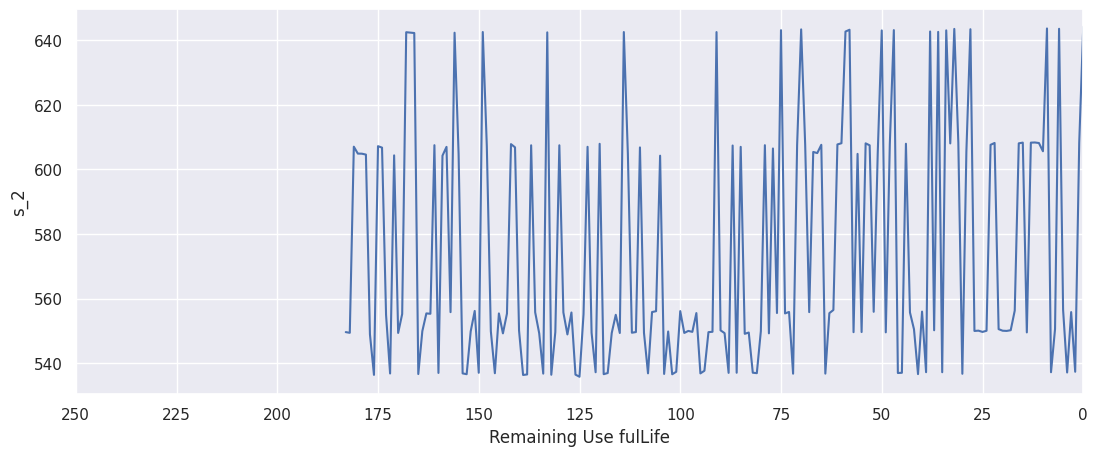

In [ ]:
def plot_signal(df, signal_name, unit_nr=None):
    plt.figure(figsize=(13,5))

    if unit_nr:
        plt.plot('RUL', signal_name,
                data=df[df['unit_nr']==unit_nr])
    else:
        for i in train['unit_nr'].unique():
            if (i % 10 == 0):  # only ploting every 10th unit_nr
                plt.plot('RUL', signal_name,
                         data=df[df['unit_nr']==i])
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(signal_name)
    plt.xlabel('Remaining Useful Life')
    plt.show()

# specifically plotting s_2, I'm using this as an example throughout the rest of the analysis
plot_signal(train, 's_2', unit_nr=10)

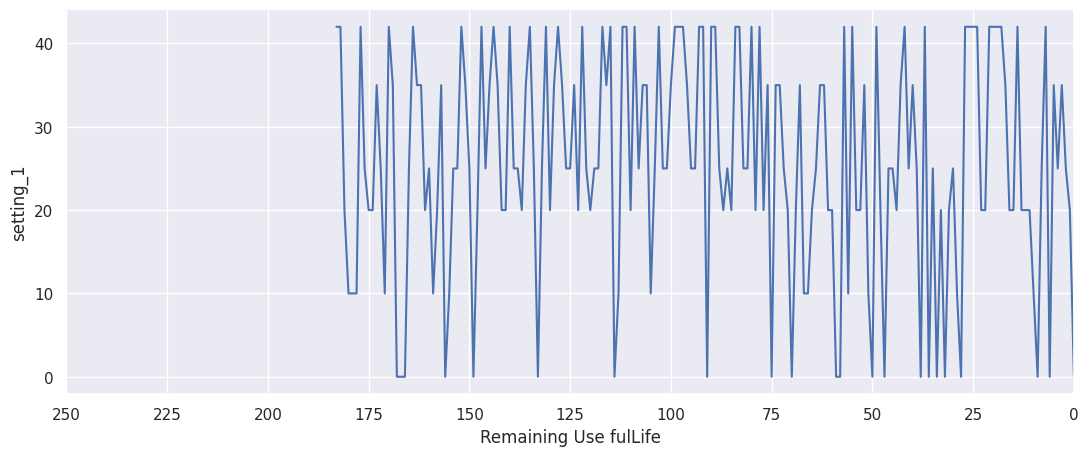

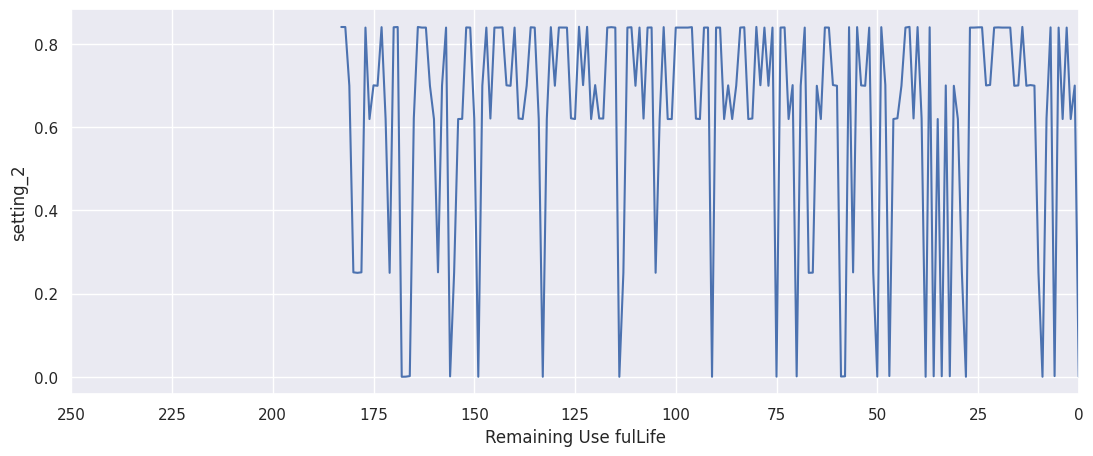

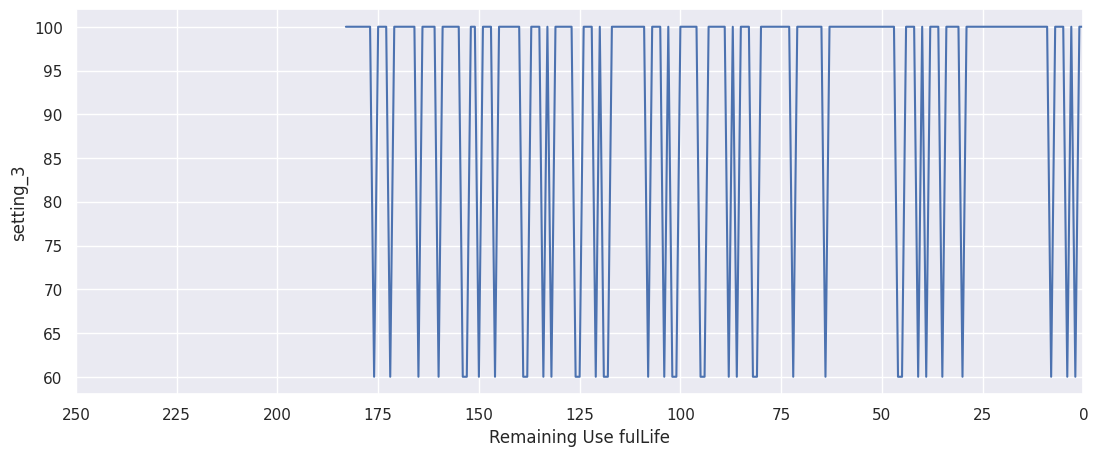

In [ ]:
for setting in setting_names:
    plot_signal(train, setting, unit_nr=10)

In [ ]:
X_train = train[setting_names + sensor_names].copy()
y_train = train['RUL'].copy()
y_train_clipped = y_train.clip(upper=125)

# get last row of each engine
X_test = test.drop('time_cycles', axis=1).groupby('unit_nr').last().copy()

In [ ]:
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict and evaluate
y_hat_train = lm.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = lm.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:45.02973737819636, R2:0.5763193277684177
test set RMSE:33.942725282216124, R2:0.6016440598065049


In [ ]:
from sklearn.model_selection import GroupShuffleSplit

# eventhough we set np and tf seeds, gss requires its own seed
gss = GroupShuffleSplit(n_splits=1, train_size=0.80, random_state=42)

def train_val_group_split(X, y, gss, groups, print_groups=True):

    for idx_train, idx_val in gss.split(X, y, groups=groups):
        if print_groups:
            print('train_split_engines', train.iloc[idx_train]['unit_nr'].unique(), '\n')
            print('validate_split_engines', train.iloc[idx_val]['unit_nr'].unique(), '\n')

        X_train_split = X.iloc[idx_train].copy()
        y_train_split = y.iloc[idx_train].copy()
        X_val_split = X.iloc[idx_val].copy()
        y_val_split = y.iloc[idx_val].copy()
    return X_train_split, y_train_split, X_val_split, y_val_split

split_result = train_val_group_split(X_train, y_train_clipped, gss, train['unit_nr'])
X_train_split, y_train_clipped_split, X_val_split, y_val_clipped_split = split_result

train_split_engines [  1   2   3   4   5   6   8   9  12  13  14  15  17  18  21  22  23  24
  27  28  29  30  32  33  35  36  37  38  39  40  41  42  43  44  45  48
  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66
  67  68  70  71  72  73  74  75  77  79  80  81  82  83  84  85  86  87
  88  89  90  92  94  95  96  99 100 101 103 104 106 107 108 109 110 111
 112 113 116 117 118 119 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 141 142 144 146 147 148 149 150 152 153 154
 156 157 158 160 161 162 163 164 165 166 167 169 170 171 172 173 175 176
 177 179 181 183 184 185 187 188 189 190 192 193 194 195 196 198 199 200
 201 203 204 208 209 210 211 215 216 217 218 219 220 222 223 225 226 227
 228 230 231 232 233 234 235 236 239 240 241 242 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 260] 

validate_split_engines [  7  10  11  16  19  20  25  26  31  34  46  47  69  76  78  91  93  97
  98 102 105 114 115 120 140 143 145 

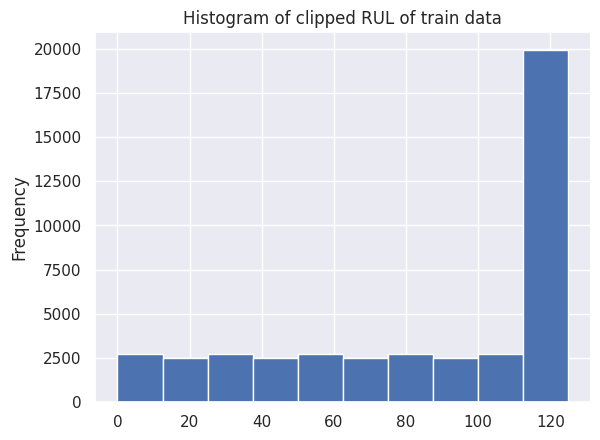

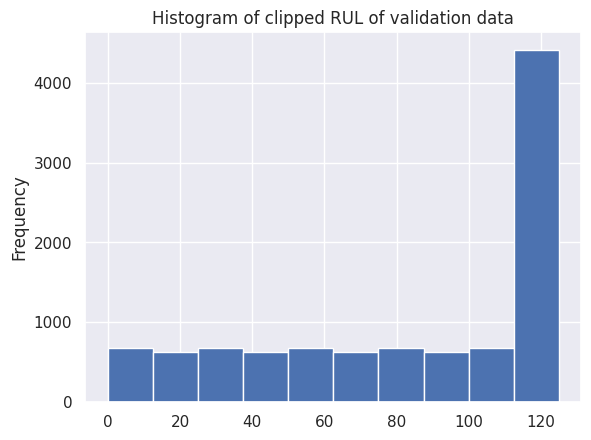

In [ ]:
plt.figure()
y_train_clipped_split.plot(kind='hist')
plt.title("Histogram of clipped RUL of train data")
plt.show()
plt.close()

plt.figure()
y_val_clipped_split.plot(kind='hist')
plt.title("Histogram of clipped RUL of validation data")
plt.show()
plt.close()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
scaler.fit(X_train[sensor_names])
X_train_scaled = X_train.copy()
X_train_scaled[sensor_names] = pd.DataFrame(scaler.transform(X_train[sensor_names]), columns=sensor_names)


X_test_scaled = X_test.copy()
X_test_scaled[sensor_names] = pd.DataFrame(scaler.transform(X_test[sensor_names]), columns=sensor_names, index=X_test.index)
# set index because unit_nr begins at 1 instead of 0


In [ ]:
split_result = train_val_group_split(X_train_scaled, y_train_clipped, gss, train['unit_nr'], print_groups=True)
X_train_split_scaled, y_train_clipped_split_scaled, X_val_split_scaled, y_val_clipped_split_scaled = split_result


train_split_engines [  1   2   3   4   5   6   8   9  12  13  14  15  17  18  21  22  23  24
  27  28  29  30  32  33  35  36  37  38  39  40  41  42  43  44  45  48
  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66
  67  68  70  71  72  73  74  75  77  79  80  81  82  83  84  85  86  87
  88  89  90  92  94  95  96  99 100 101 103 104 106 107 108 109 110 111
 112 113 116 117 118 119 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 141 142 144 146 147 148 149 150 152 153 154
 156 157 158 160 161 162 163 164 165 166 167 169 170 171 172 173 175 176
 177 179 181 183 184 185 187 188 189 190 192 193 194 195 196 198 199 200
 201 203 204 208 209 210 211 215 216 217 218 219 220 222 223 225 226 227
 228 230 231 232 233 234 235 236 239 240 241 242 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 260] 

validate_split_engines [  7  10  11  16  19  20  25  26  31  34  46  47  69  76  78  91  93  97
  98 102 105 114 115 120 140 143 145 

In [ ]:
train_cols = setting_names + sensor_names
input_dim = len(train_cols)

model = Sequential()
model.add(Dense(16, input_dim=input_dim, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
epochs = 20

history = model.fit(X_train_split_scaled[train_cols], y_train_clipped_split_scaled,
                    validation_data=(X_val_split_scaled[train_cols], y_val_clipped_split_scaled),
                    epochs=epochs)

Epoch 1/20
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 2265.6235 - val_loss: 1782.6312
Epoch 2/20
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 1726.4341 - val_loss: 1700.8457
Epoch 3/20
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1686.2856 - val_loss: 1649.9755
Epoch 4/20
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1633.4691 - val_loss: 1594.6797
Epoch 5/20
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1526.5480 - val_loss: 1446.0380
Epoch 6/20
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1439.2484 - val_loss: 1483.4800
Epoch 7/20
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1342.1865 - val_loss: 1204.8114
Epoch 8/20
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1163.1378 - val_loss: 1016.5548
Epoch 9/20
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 935.2831 - val_loss: 771.2722
Epoch 10/20
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 703.9660 - val_loss: 692.7232
Epoch 11/20
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 

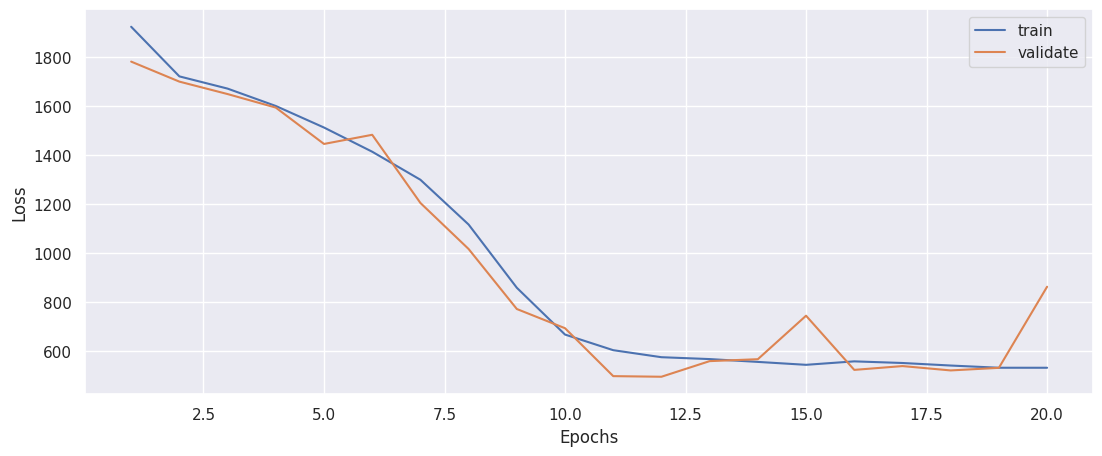

In [ ]:
def plot_loss(fit_history):
    plt.figure(figsize=(13,5))
    plt.plot(range(1, len(fit_history.history['loss'])+1), fit_history.history['loss'], label='train')
    plt.plot(range(1, len(fit_history.history['val_loss'])+1), fit_history.history['val_loss'], label='validate')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history)

In [ ]:
y_hat_train = model.predict(X_train_scaled[train_cols])
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = model.predict(X_test_scaled[train_cols])
evaluate(y_test, y_hat_test)

1680/1680 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
train set RMSE:28.210166191685225, R2:0.5415794849395752
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
test set RMSE:35.96904016770447, R2:0.552662193775177


In [ ]:
def add_operating_condition(df):
    df_op_cond = df.copy()

    df_op_cond['setting_1'] = df_op_cond['setting_1'].round()
    df_op_cond['setting_2'] = df_op_cond['setting_2'].round(decimals=2)

    # converting settings to string and concatanating makes the operating condition into a categorical variable
    df_op_cond['op_cond'] = df_op_cond['setting_1'].astype(str) + '_' + \
                        df_op_cond['setting_2'].astype(str) + '_' + \
                        df_op_cond['setting_3'].astype(str)

    return df_op_cond

X_train_condition = add_operating_condition(train)
X_test_condition = add_operating_condition(X_test)


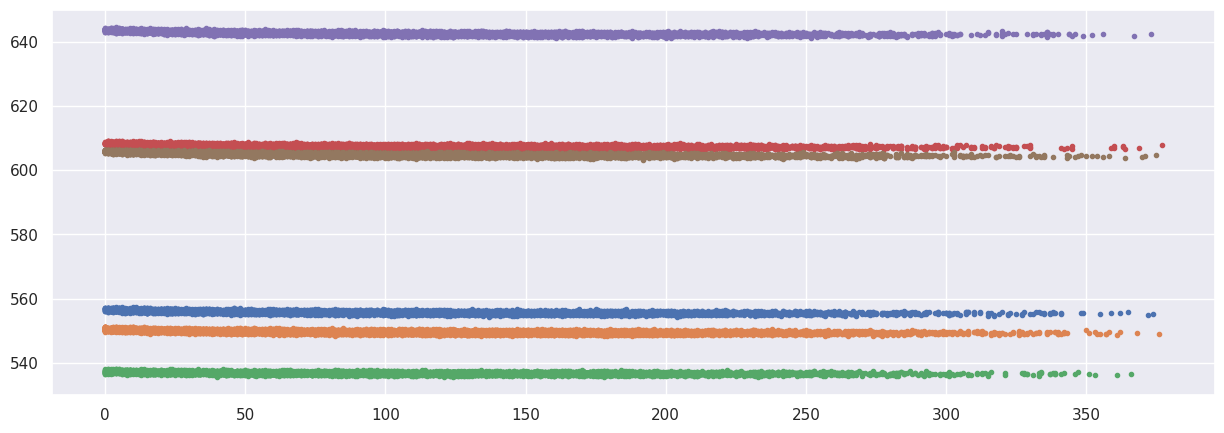

In [ ]:
plt.figure(figsize=(15,5))

# Get unique operating conditions from the 'op_cond' column
op_cond = X_train_condition['op_cond'].unique()

for condition in op_cond:
    data = X_train_condition.loc[X_train_condition['op_cond']==condition]
    plt.plot(data['RUL'], data['s_2'], '.')

In [ ]:
def condition_scaler(df_train, df_test, sensor_names):
    # apply operating condition specific scaling
    scaler = StandardScaler()
    for condition in df_train['op_cond'].unique():
        scaler.fit(df_train.loc[df_train['op_cond']==condition, sensor_names])
        df_train.loc[df_train['op_cond']==condition, sensor_names] = scaler.transform(df_train.loc[df_train['op_cond']==condition, sensor_names])
        df_test.loc[df_test['op_cond']==condition, sensor_names] = scaler.transform(df_test.loc[df_test['op_cond']==condition, sensor_names])
    return df_train, df_test

X_train_condition_scaled, X_test_condition_scaled = condition_scaler(X_train_condition, X_test_condition, sensor_names)

for sensor in sensor_names:
  plot_signal(X_train_condition_scaled, sensor)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
remaining_sensors = ['s_2', 's_3', 's_4', 's_7', 's_8', 's_9',
       's_11', 's_12', 's_13', 's_14', 's_15', 's_17', 's_20', 's_21']

drop_sensors = [element for element in sensor_names if element not in remaining_sensors]

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1359/1359 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 2668.7820 - val_loss: 434.7899
Epoch 2/20
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 432.6740 - val_loss: 421.4801
Epoch 3/20
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 418.4538 - val_loss: 393.8435
Epoch 4/20
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 398.9846 - val_loss: 383.9587
Epoch 5/20
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 391.1266 - val_loss: 386.5356
Epoch 6/20
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 380.6622 - val_loss: 389.1931
Epoch 7/20
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 384.3440 - val_loss: 394.9150
Epoch 8/20
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 384.4244 - val_loss: 392.4792
Epoch 9/20
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 381.2528 - val_loss: 391.8403
Epoch 10/20
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 387.4001 - val_loss: 390.2959
Epoch 11/20
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 381.1218 - val_loss: 395.5

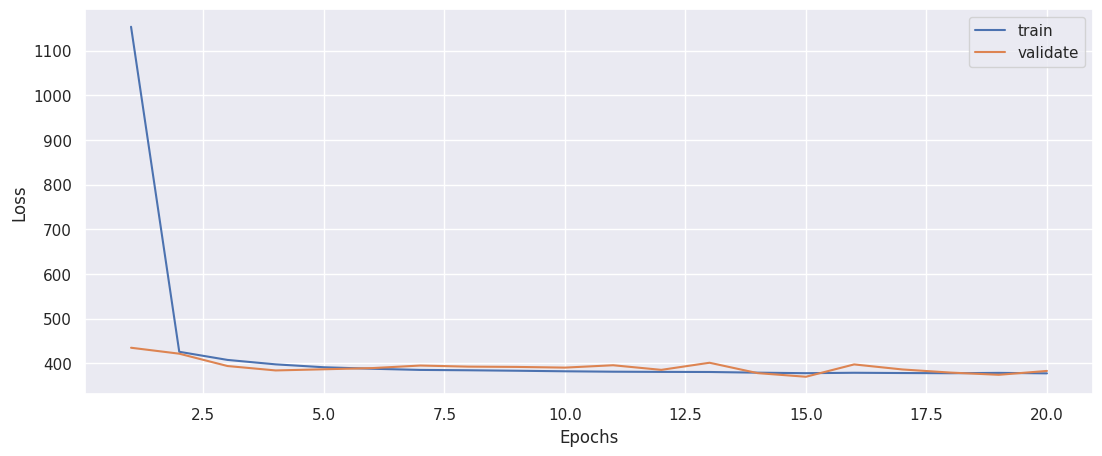

In [ ]:
split_result = train_val_group_split(X_train_condition_scaled, y_train_clipped, gss, train['unit_nr'], print_groups=False)
X_train_split_condition_scaled, y_train_clipped_split_condition_scaled = split_result[:2]
X_val_split_condition_scaled, y_val_clipped_split_condition_scaled = split_result[2:]

# we have to redefine our model as our inputs changed
input_dim = len(X_train_split_condition_scaled[remaining_sensors].columns)

model = Sequential()
model.add(Dense(16, input_dim=input_dim, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train_split_condition_scaled[remaining_sensors], y_train_clipped_split_condition_scaled,
                    validation_data=(X_val_split_condition_scaled[remaining_sensors], y_val_clipped_split_condition_scaled),
                    epochs=epochs)
plot_loss(history)

In [ ]:
y_hat_train = model.predict(X_train_condition_scaled[remaining_sensors])
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = model.predict(X_test_condition_scaled[remaining_sensors])
evaluate(y_test, y_hat_test)

1680/1680 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
train set RMSE:19.375951337531145, R2:0.7837386727333069
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
test set RMSE:29.377642833241403, R2:0.7015910744667053


In [ ]:
def add_specific_lags(df_input, list_of_lags, columns):
    df = df_input.copy()
    for i in list_of_lags:
        lagged_columns = [col + '_lag_{}'.format(i) for col in columns]
        df[lagged_columns] = df.groupby('unit_nr')[columns].shift(i)
    df.dropna(inplace=True)
    return df

<ipython-input-29-5d9d5c85e4a0>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.1674041  -1.59188977 -0.1674041  ...  0.54483874  1.96932442
  2.68156725]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_train.loc[df_train['op_cond']==condition, sensor_names] = scaler.transform(df_train.loc[df_train['op_cond']==condition, sensor_names])
<ipython-input-29-5d9d5c85e4a0>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.87964693  1.25708158 -0.87964693 ... -0.1674041  -1.59188977
 -0.1674041 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_test.loc[df_test['op_cond']==condition, sensor_names] = scaler.transform(df_test.loc[df_test['op_cond']==condition, sensor_names])
<ipython-input-33-b4547710e504>:5: PerformanceWarning: DataFra

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1229/1229 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 2431.6453 - val_loss: 401.0100
Epoch 2/20
1229/1229 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 416.8993 - val_loss: 361.2731
Epoch 3/20
1229/1229 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 374.9459 - val_loss: 363.5926
Epoch 4/20
1229/1229 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 355.8663 - val_loss: 369.8904
Epoch 5/20
1229/1229 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 344.6334 - val_loss: 376.5526
Epoch 6/20
1229/1229 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 337.8607 - val_loss: 343.7976
Epoch 7/20
1229/1229 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 335.6720 - val_loss: 354.4477
Epoch 8/20
1229/1229 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 328.0318 - val_loss: 342.7073
Epoch 9/20
1229/1229 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 330.2367 - val_loss: 322.6389
Epoch 10/20
1229/1229 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 319.9570 - val_loss: 338.9312
Epoch 11/20
1229/1229 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 319.1857 - val_loss: 329.0

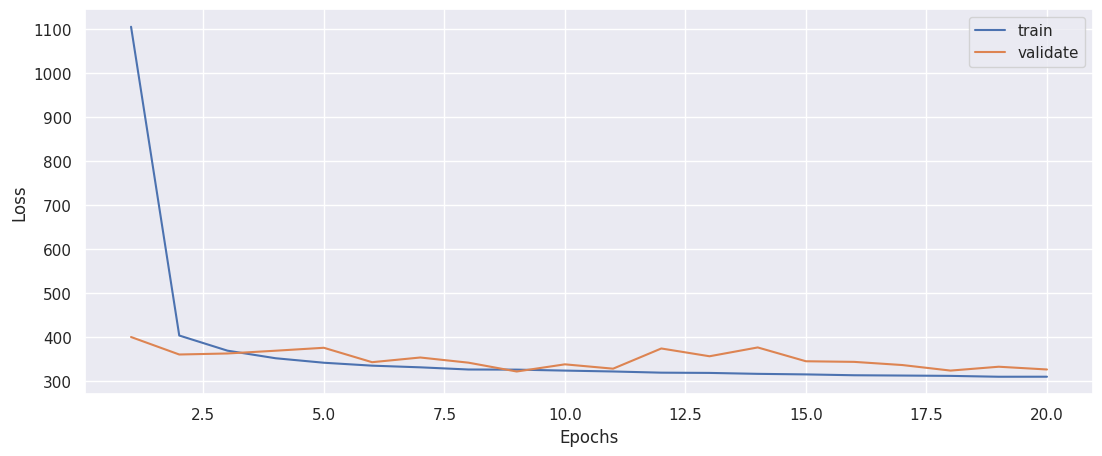

In [ ]:
specific_lags = [1,2,3,4,5,10,20]  # laggs which worked well in the timeseries solution for FD001

# prep data
X_train_condition = add_operating_condition(train.drop(drop_sensors, axis=1))
X_test_condition = add_operating_condition(test.drop(drop_sensors, axis=1))

X_train_condition_scaled, X_test_condition_scaled = condition_scaler(X_train_condition, X_test_condition, remaining_sensors)

X_train_condition_scaled_lagged = add_specific_lags(X_train_condition_scaled, specific_lags, remaining_sensors)
X_test_condition_scaled_lagged = add_specific_lags(X_test_condition_scaled, specific_lags, remaining_sensors)

X_train_condition_scaled_lagged.drop(index_names+setting_names+['op_cond', 'RUL'], axis=1, inplace=True)
X_test_condition_scaled_lagged = X_test_condition_scaled_lagged.drop(['time_cycles', 'op_cond']+setting_names, axis=1).groupby('unit_nr').last().copy()

idx = X_train_condition_scaled_lagged.index
y_train_clipped_lagged = y_train_clipped.iloc[idx]

split_result = train_val_group_split(X_train_condition_scaled_lagged, y_train_clipped_lagged, gss, train.iloc[idx]['unit_nr'], print_groups=False)
X_train_split_condition_scaled_lagged, y_train_clipped_split_lagged = split_result[:2]
X_val_split_condition_scaled_lagged, y_val_clipped_split_lagged = split_result[2:]

# we have to redefine our model as the input dimensions have changed
input_dim = len(X_train_split_condition_scaled_lagged.columns)

model = Sequential()
model.add(Dense(16, input_dim=input_dim, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train_split_condition_scaled_lagged, y_train_clipped_split_lagged,
                    validation_data=(X_val_split_condition_scaled_lagged, y_val_clipped_split_lagged),
                    epochs=epochs)

plot_loss(history)

In [ ]:
y_hat_train = model.predict(X_train_condition_scaled_lagged)
evaluate(y_train_clipped_lagged, y_hat_train, 'train')

y_hat_test = model.predict(X_test_condition_scaled_lagged)
evaluate(y_test, y_hat_test)

1518/1518 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
train set RMSE:17.59571949317282, R2:0.8231476545333862
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
test set RMSE:29.41071839390042, R2:0.7009187936782837


<ipython-input-29-5d9d5c85e4a0>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.1674041  -1.59188977 -0.1674041  ...  0.54483874  1.96932442
  2.68156725]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_train.loc[df_train['op_cond']==condition, sensor_names] = scaler.transform(df_train.loc[df_train['op_cond']==condition, sensor_names])
<ipython-input-29-5d9d5c85e4a0>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.87964693  1.25708158 -0.87964693 ... -0.1674041  -1.59188977
 -0.1674041 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_test.loc[df_test['op_cond']==condition, sensor_names] = scaler.transform(df_test.loc[df_test['op_cond']==condition, sensor_names])


Original signal assumed stationary?  True


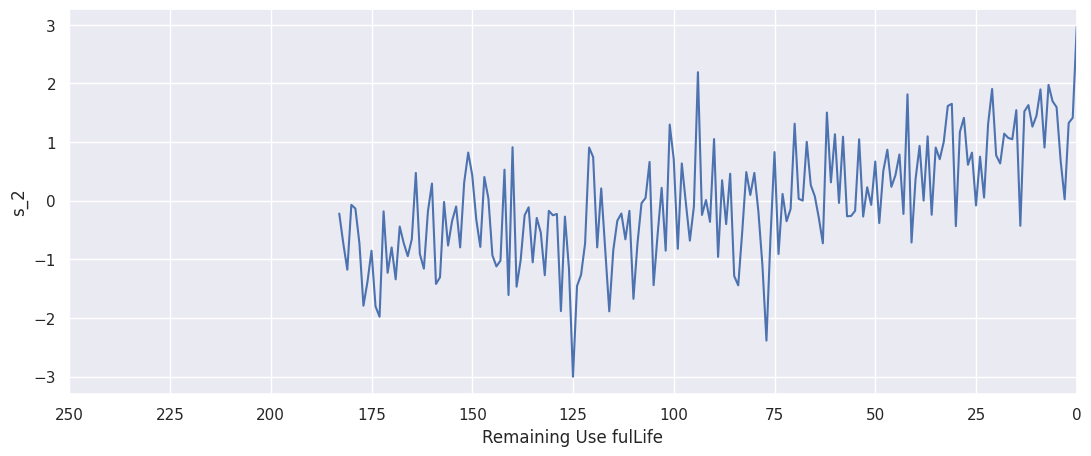

In [ ]:
from statsmodels.tsa.stattools import adfuller
X_train_condition = add_operating_condition(train.drop(drop_sensors, axis=1))
X_test_condition = add_operating_condition(test.drop(drop_sensors, axis=1))

X_train_condition_scaled, _ = condition_scaler(X_train_condition, X_test_condition, remaining_sensors)


adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(
                                            X_train_condition_scaled.loc[X_train_condition_scaled['unit_nr'] == 10,'s_2'],
                                            maxlag=1)
print('Original signal assumed stationary? ', pvalue < 0.05)
plot_signal(X_train_condition_scaled, 's_2', 10)

In [ ]:
def exponential_smoothing(df, sensors, n_samples, alpha=0.4):
    df = df.copy()
    # first, calculate the exponential weighted mean of desired sensors
    # Reset the index to avoid the incompatible index error
    df[sensors] = df.groupby('unit_nr')[sensors].apply(lambda x: x.ewm(alpha=alpha).mean()).reset_index(level=0, drop=True)

    # second, drop first n_samples of each unit_nr to reduce filter delay
    def create_mask(data, samples):
        result = np.ones_like(data)
        result[0:samples] = 0
        return result

    mask = df.groupby('unit_nr')['unit_nr'].transform(create_mask, samples=n_samples).astype(bool)
    df = df[mask]

    return df

<ipython-input-29-5d9d5c85e4a0>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.1674041  -1.59188977 -0.1674041  ...  0.54483874  1.96932442
  2.68156725]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_train.loc[df_train['op_cond']==condition, sensor_names] = scaler.transform(df_train.loc[df_train['op_cond']==condition, sensor_names])
<ipython-input-29-5d9d5c85e4a0>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.87964693  1.25708158 -0.87964693 ... -0.1674041  -1.59188977
 -0.1674041 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_test.loc[df_test['op_cond']==condition, sensor_names] = scaler.transform(df_test.loc[df_test['op_cond']==condition, sensor_names])
<ipython-input-33-b4547710e504>:5: PerformanceWarning: DataFra

Epoch 1/20
1229/1229 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 274.0347 - val_loss: 276.9495
Epoch 2/20
1229/1229 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 262.5542 - val_loss: 315.0312
Epoch 3/20
1229/1229 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 265.7958 - val_loss: 305.7692
Epoch 4/20
1229/1229 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 258.2880 - val_loss: 299.4562
Epoch 5/20
1229/1229 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 258.7715 - val_loss: 297.4383
Epoch 6/20
1229/1229 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 249.0476 - val_loss: 311.5473
Epoch 7/20
1229/1229 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 249.9249 - val_loss: 304.6784
Epoch 8/20
1229/1229 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 251.0238 - val_loss: 288.0656
Epoch 9/20
1229/1229 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 248.2118 - val_loss: 291.4721
Epoch 10/20
1229/1229 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 247.5861 - val_loss: 301.1853
Epoch 11/20
1229/1229 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 247.7911 - val_l

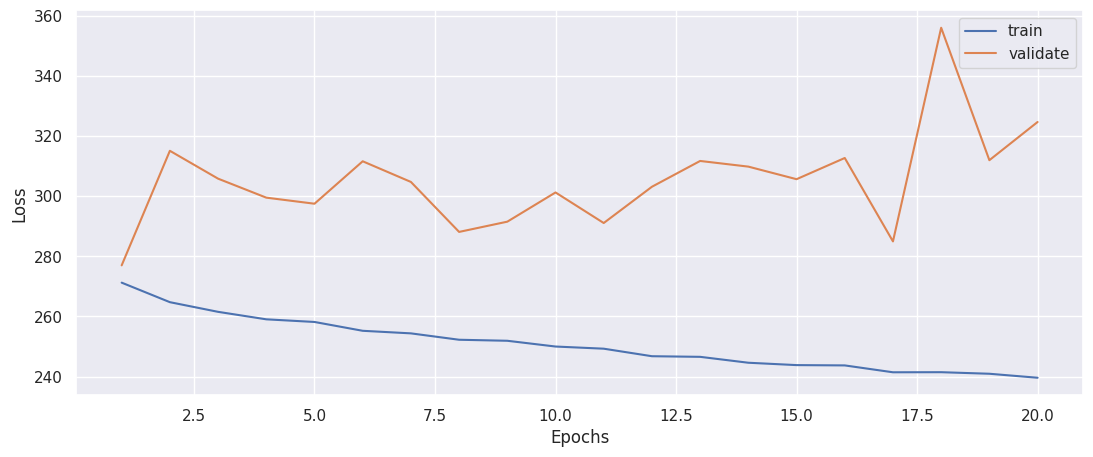

In [ ]:
X_train_interim = add_operating_condition(train.drop(drop_sensors, axis=1))
X_test_interim = add_operating_condition(test.drop(drop_sensors, axis=1))

X_train_interim, X_test_interim = condition_scaler(X_train_interim, X_test_interim, remaining_sensors)

X_train_interim = exponential_smoothing(X_train_interim, remaining_sensors, 0, 0.4)
X_test_interim = exponential_smoothing(X_test_interim, remaining_sensors, 0, 0.4)

X_train_interim = add_specific_lags(X_train_interim, specific_lags, remaining_sensors)
X_test_interim = add_specific_lags(X_test_interim, specific_lags, remaining_sensors)

X_train_smooth_lagged = X_train_interim.drop(index_names+setting_names+['op_cond', 'RUL'], axis=1)
X_test_smooth_lagged = X_test_interim.drop(['time_cycles', 'op_cond']+setting_names,
                                      axis=1).groupby('unit_nr').last().copy()

idx = X_train_smooth_lagged.index
y_train_clipped_lagged = y_train_clipped.iloc[idx]

# train-val split
split_result = train_val_group_split(X_train_smooth_lagged, y_train_clipped_lagged, gss, train.iloc[idx]['unit_nr'], print_groups=False)
X_train_split_smooth_lagged, y_train_clipped_split_lagged = split_result[:2]
X_val_split_smooth_lagged, y_val_clipped_split_lagged = split_result[2:]

history = model.fit(X_train_split_smooth_lagged, y_train_clipped_split_lagged,
                    validation_data=(X_val_split_smooth_lagged, y_val_clipped_split_lagged),
                    epochs=epochs)

plot_loss(history)

In [ ]:
# predict and evaluate
y_hat_train = model.predict(X_train_smooth_lagged)
evaluate(y_train_clipped_lagged, y_hat_train, 'train')

y_hat_test = model.predict(X_test_smooth_lagged)
evaluate(y_test, y_hat_test)

1518/1518 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
train set RMSE:15.848085190306707, R2:0.8565335273742676
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
test set RMSE:27.740703503324767, R2:0.733919620513916


In [ ]:
alpha_list = [0.01, 0.05] + list(np.arange(10,60+1,10)/100)
epoch_list = list(np.arange(10,30+1,5))
nodes_list = [[16, 32, 64], [32, 64, 128], [64, 128, 256], [128, 256, 512]]

# lowest dropout=0.1, because I know zero dropout will yield better training results but worse generalization (overfitting)
dropouts = list(np.arange(1,5)/10)

# earlier testing revealed relu performed significantly worse, so I removed it from the options
activation_functions = ['tanh', 'sigmoid']
batch_size_list = [32, 64, 128, 256, 512]

tuning_options = np.prod([len(alpha_list),
                          len(epoch_list),
                          len(nodes_list),
                          len(dropouts),
                          len(activation_functions),
                          len(batch_size_list)])
tuning_options

6400

In [ ]:
def prep_data(df_train, train_label, df_test, remaining_sensors, lags, alpha, n=0):
    X_train_interim = add_operating_condition(df_train)
    X_test_interim = add_operating_condition(df_test)

    X_train_interim, X_test_interim = condition_scaler(X_train_interim, X_test_interim, remaining_sensors)

    X_train_interim = exponential_smoothing(X_train_interim, remaining_sensors, n, alpha)
    X_test_interim = exponential_smoothing(X_test_interim, remaining_sensors, n, alpha)

    X_train_interim = add_specific_lags(X_train_interim, lags, remaining_sensors)
    X_test_interim = add_specific_lags(X_test_interim, lags, remaining_sensors)

    X_train_interim.drop(index_names+setting_names+['op_cond', 'RUL'], axis=1, inplace=True)
    X_test_interim = X_test_interim.drop(
        ['time_cycles', 'op_cond']+setting_names, axis=1).groupby('unit_nr').last().copy()

    idx = X_train_interim.index
    train_label = train_label.iloc[idx]
    return X_train_interim, train_label, X_test_interim, idx

In [ ]:
def create_model(input_dim, nodes_per_layer, dropout, activation, weights_file):
    model = Sequential()
    model.add(Dense(nodes_per_layer[0], input_dim=input_dim, activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(nodes_per_layer[1], activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(nodes_per_layer[2], activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')
    model.save_weights(weights_file)
    return model

In [ ]:
# ITERATIONS = 100

# results = pd.DataFrame(columns=['MSE', 'std_MSE', # bigger std means less robust
#                                 'alpha', 'epochs',
#                                 'nodes', 'dropout',
#                                 'activation', 'batch_size'])
# weights_file = 'mlp_hyper_parameter.weights.h5'
# specific_lags = [1,2,3,4,5,10,20]

# for i in range(ITERATIONS):
#     if ITERATIONS < 10:
#         print('iteration ', i+1)
#     elif ((i+1) % 10 == 0):
#         print('iteration ', i+1)

#     mse = []

#     # init parameters
#     alpha = random.sample(alpha_list, 1)[0]
#     epochs = random.sample(epoch_list, 1)[0]
#     nodes_per_layer = random.sample(nodes_list, 1)[0]
#     dropout = random.sample(dropouts, 1)[0]
#     activation = random.sample(activation_functions, 1)[0]
#     batch_size = random.sample(batch_size_list, 1)[0]

#     # create dataset
#     df_train, train_label, _, idx = prep_data(df_train=train.drop(drop_sensors, axis=1),
#                                             train_label=y_train_clipped,
#                                             df_test=test.drop(drop_sensors, axis=1),
#                                             remaining_sensors=remaining_sensors,
#                                             lags=specific_lags,
#                                             alpha=alpha)

#     # create model
#     input_dim = len(df_train.columns)
#     model = create_model(input_dim, nodes_per_layer, dropout, activation, weights_file)


#     # create train-validation split
#     gss_search = GroupShuffleSplit(n_splits=3, train_size=0.80, random_state=42)
#     for idx_train, idx_val in gss_search.split(df_train, train_label, groups=train.iloc[idx]['unit_nr']):
#         X_train_split = df_train.iloc[idx_train].copy()
#         y_train_split = train_label.iloc[idx_train].copy()
#         X_val_split = df_train.iloc[idx_val].copy()
#         y_val_split = train_label.iloc[idx_val].copy()

#         # train and evaluate model
#         model.compile(loss='mean_squared_error', optimizer='adam')
#         model.load_weights(weights_file)  # reset optimizer and node weights before every training iteration
#         history = model.fit(X_train_split, y_train_split,
#                             validation_data=(X_val_split, y_val_split),
#                             epochs=epochs,
#                             batch_size=batch_size,
#                             verbose=0)

#         mse.append(history.history['val_loss'][-1])


#     # append results
#     d = {'MSE':np.mean(mse), 'std_MSE':np.std(mse), 'alpha':alpha,
#          'epochs':epochs, 'nodes':str(nodes_per_layer), 'dropout':dropout,
#          'activation':activation, 'batch_size':batch_size}
#     results = pd.concat([results, pd.DataFrame(d, index=[0])], ignore_index=True)

In [ ]:
# alpha = 0.05
# epochs = 10
# specific_lags = [1,2,3,4,5,10,20]
# nodes = [64, 128, 256]
# dropout = 0.2
# activation = 'tanh'
# batch_size = 64


# df_train, train_label, df_test, _ = prep_data(df_train=train.drop(drop_sensors, axis=1),
#                                         train_label=y_train_clipped,
#                                         df_test=test.drop(drop_sensors, axis=1),
#                                         remaining_sensors=remaining_sensors,
#                                         lags=specific_lags,
#                                         alpha=alpha)

# input_dim = len(df_train.columns)
# weights_file = 'fd002_model_weights.h5'
# final_model = create_model(input_dim,
#                            nodes_per_layer=nodes,
#                            dropout=dropout,
#                            activation=activation,
#                            weights_file=weights_file)

# final_model.compile(loss='mean_squared_error', optimizer='adam')
# final_model.load_weights(weights_file)

# final_model.fit(df_train, train_label,
#                epochs=epochs,
#                batch_size=batch_size)

# # predict and evaluate
# y_hat_train = final_model.predict(df_train)
# evaluate(train_label, y_hat_train, 'train')

# y_hat_test = final_model.predict(df_test)
# evaluate(y_test, y_hat_test)

<ipython-input-29-5d9d5c85e4a0>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.1674041  -1.59188977 -0.1674041  ...  0.54483874  1.96932442
  2.68156725]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_train.loc[df_train['op_cond']==condition, sensor_names] = scaler.transform(df_train.loc[df_train['op_cond']==condition, sensor_names])
<ipython-input-29-5d9d5c85e4a0>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.87964693  1.25708158 -0.87964693 ... -0.1674041  -1.59188977
 -0.1674041 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_test.loc[df_test['op_cond']==condition, sensor_names] = scaler.transform(df_test.loc[df_test['op_cond']==condition, sensor_names])
<ipython-input-33-b4547710e504>:5: PerformanceWarning: DataFra

ValueError: The filename must end in `.weights.h5`. Received: filepath=fd002_model_weights.h5